In [2]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import os
from PIL import Image
import csv


In [16]:
# Path to your NDVI GeoTIFF file
ndvi_tiff_path = r'F:\deforestation-detection-master\data\tiff\ndvi_img_2019_03_27.tif'

# Open the NDVI GeoTIFF file
with rasterio.open(ndvi_tiff_path) as src:
    # Read the NDVI data (assuming it's a single-band image)
    ndvi_data = src.read(1)  # Replace 1 with the appropriate band index if needed


### Crop image to small parts

In [12]:
def crop_and_save_tiff(folder_path, crop_size, output_folder):
    tiff_files = [file for file in os.listdir(folder_path) if file.endswith('.tif')]
    
    for tiff_file in tiff_files:
        tiff_path = os.path.join(folder_path, tiff_file)  # Construct full input file path
        with rasterio.open(tiff_path) as src:
            date_str = tiff_path.split('_')[2:]
            year = date_str[0]
            month = date_str[1]
            print(year,month)

crop_and_save_tiff(r'F:\deforestation-detection-master\data\tiff', 256, r'F:\deforestation-detection-master\data\tiff\cropped_images')





2019 03


In [3]:
def crop_and_save_tiff(folder_path, crop_size, output_folder):
    tiff_files = [file for file in os.listdir(folder_path) if file.endswith('.tif')]
    
    for tiff_file in tiff_files:
        tiff_path = os.path.join(folder_path, tiff_file)  # Construct full input file path
        with rasterio.open(tiff_path) as src:

            #get year and month
            date_str = tiff_path.split('_')[2:]
            year = date_str[0]
            month = date_str[1]

            width, height = src.width, src.height
            num_rows = height // crop_size
            num_cols = width // crop_size

            os.makedirs(output_folder, exist_ok=True)

            for row in range(num_rows):
                for col in range(num_cols):
                    # Calculate the coordinates for cropping
                    left = col * crop_size
                    top = row * crop_size
                    right = (col + 1) * crop_size
                    bottom = (row + 1) * crop_size

                    # Read the image part
                    image_part = src.read(window=((top, bottom), (left, right)))

                    # Construct full output file path
                    output_file = os.path.join(output_folder, f'img_{year}_{month}_{row}_{col}.tif')
                    with rasterio.open(output_file, 'w', driver='GTiff', width=crop_size, height=crop_size,
                                      count=image_part.shape[0], dtype=image_part.dtype) as dst:
                        dst.write(image_part)

crop_and_save_tiff(r'D:\Data-Science\DSC4173 Project\data\Ndvi images', 256, r'D:\Data-Science\DSC4173 Project\data\image data')


C:\Users\S17465\AppData\Roaming\Python\Python311\site-packages\rasterio\__init__.py:329: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


### Visualize images

c:\Users\ravin\anaconda3\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


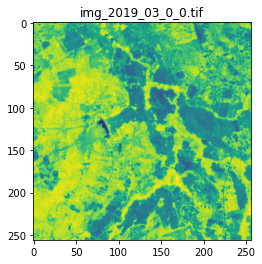

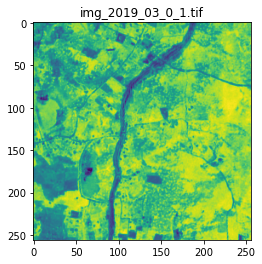

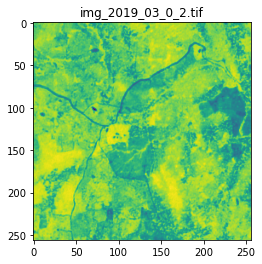

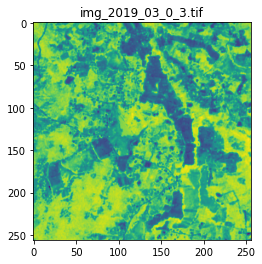

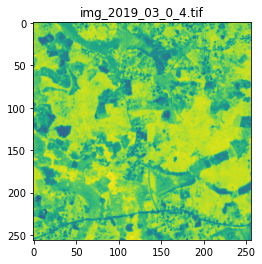

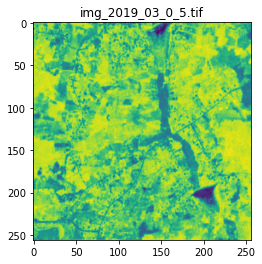

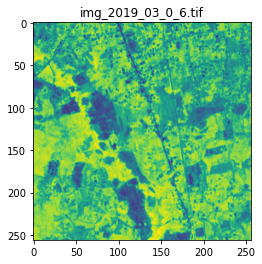

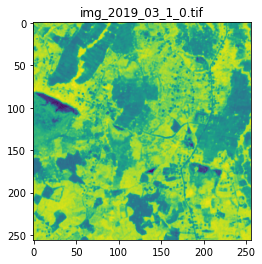

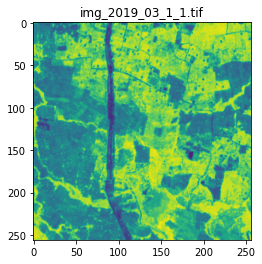

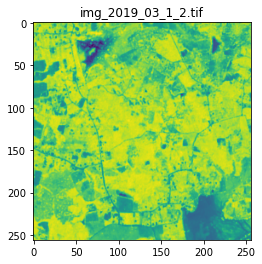

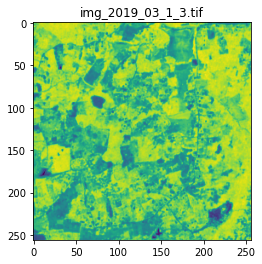

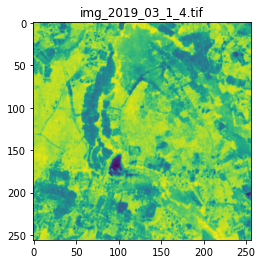

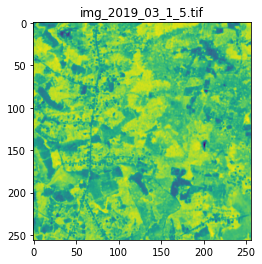

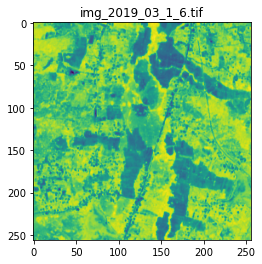

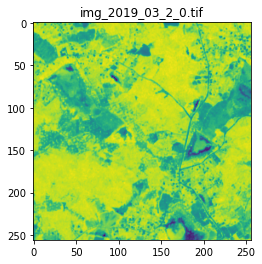

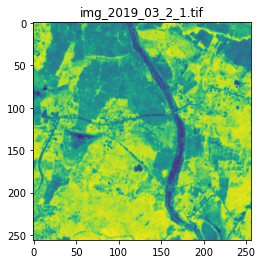

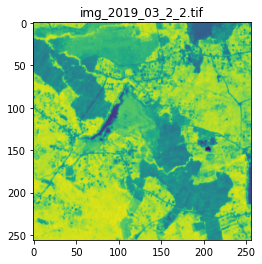

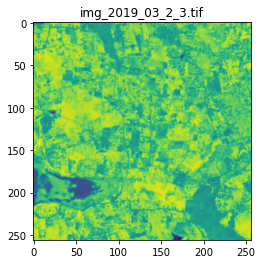

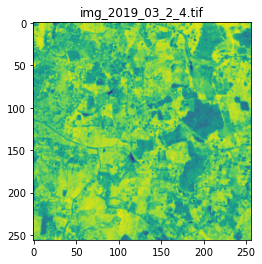

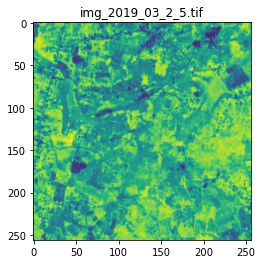

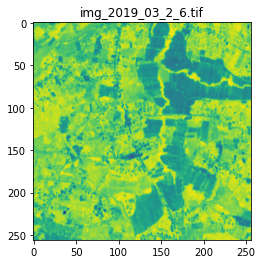

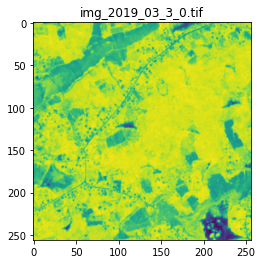

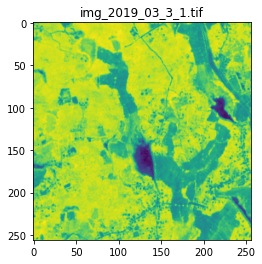

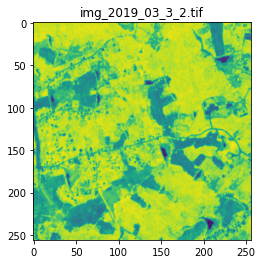

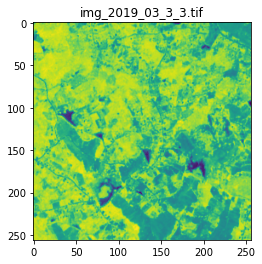

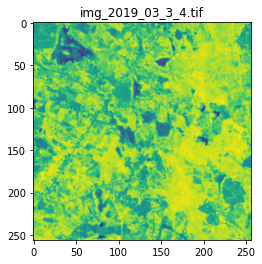

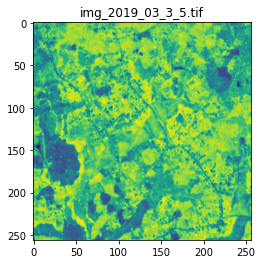

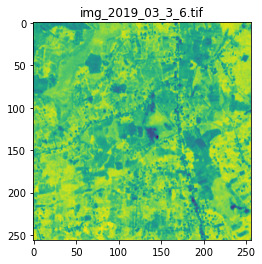

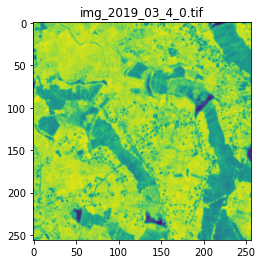

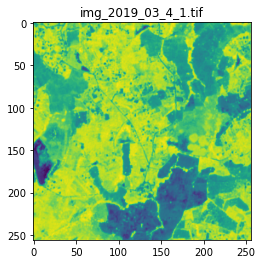

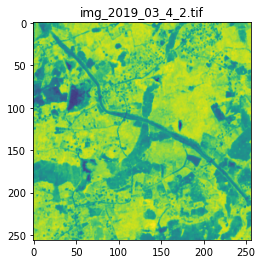

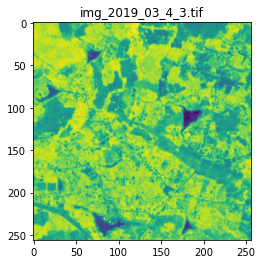

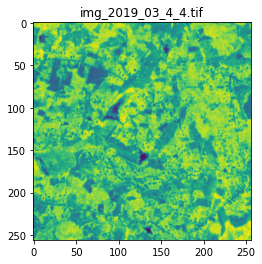

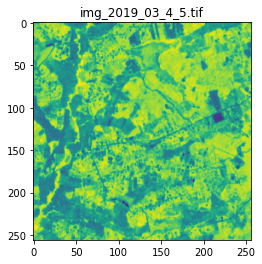

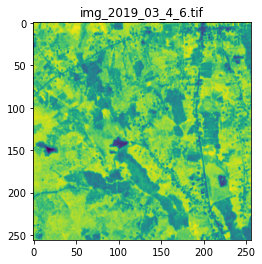

In [14]:
import os
import matplotlib.pyplot as plt
import rasterio

def visualize_tiff_images(folder_path):
    tiff_files = [file for file in os.listdir(folder_path) if file.endswith('.tif')]

    for tiff_file in tiff_files:
        tiff_path = os.path.join(folder_path, tiff_file)
        with rasterio.open(tiff_path) as src:
            image = src.read()

        plt.imshow(image.transpose(1, 2, 0))  # Transpose for correct color channels
        plt.title(tiff_file)
        plt.show()

# Replace 'folder_path' with the path to your folder containing TIFF images
visualize_tiff_images(r'F:\deforestation-detection-master\data\tiff\cropped_images')

### Calculate mean NDVI and export to csv

In [4]:
def calculate_mean_ndvi(tiff_file_path):
    with rasterio.open(tiff_file_path) as src:

        ndvi_data = src.read(1)

        deforested_mask = ndvi_data < 0.5
        non_deforested_mask = ~deforested_mask

        masked_ndvi = np.ma.masked_array(ndvi_data, mask=non_deforested_mask)

        return masked_ndvi.mean()

def process_image_data_to_csv(folder_path, output_csv_path):
    tiff_files = [file for file in os.listdir(folder_path) if file.endswith('.tif')]

    with open(output_csv_path, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(['Image Name', 'Mean NDVI'])

        for tiff_file in tiff_files:
            tiff_path = os.path.join(folder_path, tiff_file)
            mean_ndvi = calculate_mean_ndvi(tiff_path)

            csv_writer.writerow([tiff_file, mean_ndvi])


process_image_data_to_csv(r'D:\Data-Science\DSC4173 Project\data\image data', r'D:\Data-Science\DSC4173 Project\data.csv')


C:\Users\S17465\AppData\Roaming\Python\Python311\site-packages\rasterio\__init__.py:319: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
